In [2]:
import gym, torch, random, copy, time, random
import matplotlib.pyplot as plt

In [27]:
D_in = 3
H1 = 50
D_out = 5
lr = 0.005

layer_1 = torch.nn.Linear(D_in, H1)
layer_2 = torch.nn.Linear(H1, D_out)
layer_1.weight.data.fill_(0)
layer_2.weight.data.fill_(0)

model = torch.nn.Sequential(
    layer_1,
    torch.nn.ReLU(),
    layer_2
)

loss_fn = torch.nn.MSELoss(reduction="sum")

optim = torch.optim.Adam(model.parameters(), lr=lr)

0 -500.8058094015833
100 -597.4825281041077
200 -572.1708297541668
300 -560.5435691813166
400 -560.951329853613
500 -551.5790430210244
600 -536.1996660587524
700 -519.524839273274
800 -505.84690972103385
900 -490.46721879698754
1000 -480.3747451777433
1100 -468.51609113228807
1200 -457.88864758433147
1300 -447.14740266432045
1400 -441.7887107630838
1500 -436.3117210723803
1600 -431.5315875211596
1700 -425.486924592577
1800 -420.58107105880305
1900 -417.0422969195908
2000 -413.0929478215585
2100 -409.0157460545584
2200 -406.4130405941059
2300 -402.77841123900413
2400 -401.0449375326664
2500 -398.8039968665403
2600 -396.3580559139932
2700 -395.0281372861022
2800 -391.8939847901591
2900 -388.9428713460312
3000 -387.3869050846587
3100 -386.49720631761016
3200 -384.7491314809159
3300 -382.7845382530438
3400 -380.6752445307732
3500 -379.239661599525
3600 -378.30800783201477
3700 -377.21110111871906
3800 -375.37321211843044
3900 -374.8279477366259
4000 -373.6143612824642
4100 -372.61334234378

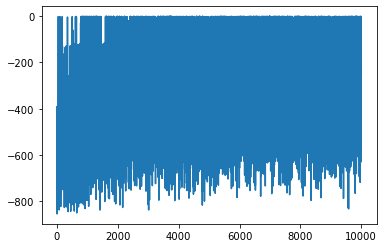

In [28]:
start_time = time.time()
env = gym.make('Pendulum-v0')
gamma = 0.9
epsilon = 0.3
epsilon_decay = 1
reward_arr = []
cum_reward = 0
for _ in range(10000):
    
    current_state = env.reset()
    episode_reward = 0
    
    for i in range(100):
        current_state = torch.FloatTensor(current_state)
        y_pred = model(current_state)
        
#         env.render()

        if random.random()<epsilon:
            action = random.randint(0,4)
            
        else:
            action = torch.argmax(y_pred).item()
        
        next_state, reward, done, info = env.step([action-2])
        
        episode_reward += reward
        cum_reward+=reward
        
#         current_state = next_state
#         if done:
#             break
#         continue
        
        if done:
            target_array = y_pred.tolist()
            target_array[action] = -100
            target_tensor = torch.FloatTensor(target_array)

            #print(action, y_pred.tolist(), target_tensor.tolist())
            loss = loss_fn(y_pred, target_tensor)

            optim.zero_grad()
            loss.backward()
            optim.step()
            break
        else:
            target_array = y_pred.tolist()
            with torch.no_grad():
                target_array[action] = reward + gamma*torch.max(model(torch.FloatTensor(next_state))).item()
            target_tensor = torch.FloatTensor(target_array)

            #print(action, y_pred.tolist(), target_tensor.tolist())
            loss = loss_fn(y_pred, target_tensor)

            optim.zero_grad()
            loss.backward()
            optim.step()

            current_state = next_state
            

    reward_arr.append(episode_reward)
    epsilon *= epsilon_decay
        
    if _%100==0:
        print(_, cum_reward/(_+1))
env.close()
plt.plot(reward_arr)
print(time.time()-start_time)

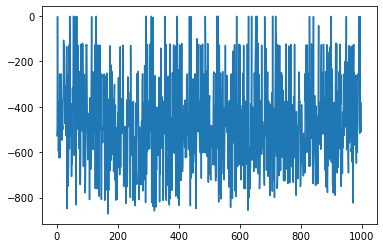

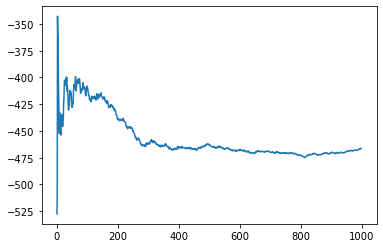

In [25]:
plt.plot(reward_arr)
plt.show()

running_avg = []
val = 0

for i in range(len(reward_arr)):
    val += reward_arr[i]
    running_avg.append(val/(i+1))
plt.plot(running_avg)
plt.show()